# Home Credit Default Risk

## Import libraries

In [2]:
import warnings
import json
import sys
import csv
import os

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import numpy as np
np.random.seed(1612)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dataset

In [4]:
home_credit_POS_CASH_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/POS_CASH_balance.csv') 

## Data Analysis

### Check types

In [5]:
home_credit_POS_CASH_balance.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [6]:
home_credit_POS_CASH_balance['SK_ID_PREV'].unique()

array([1803195, 1715348, 1784872, ..., 2452932, 1980876, 2308284])

In [7]:
home_credit_POS_CASH_balance['SK_ID_CURR'].unique()

array([182943, 367990, 397406, ..., 394310, 240059, 144536])

In [8]:
home_credit_POS_CASH_balance['MONTHS_BALANCE'].unique()

array([-31, -33, -32, -35, -38, -39, -34, -41, -37, -40, -43, -36, -42,
       -47, -44, -46, -45, -27, -25, -24, -30, -28, -26, -29, -48, -15,
       -19, -22, -14, -18, -16, -21, -17, -20, -23,  -1,  -6,  -2,  -3,
        -5,  -4, -13, -11, -10,  -9,  -7,  -8, -54, -49, -52, -53, -50,
       -51, -55, -12, -94, -95, -92, -91, -96, -93, -57, -64, -56, -59,
       -60, -66, -65, -58, -63, -62, -61, -87, -86, -88, -89, -90, -72,
       -74, -73, -82, -78, -81, -75, -77, -80, -76, -79, -69, -70, -71,
       -68, -67, -83, -85, -84])

In [9]:
home_credit_POS_CASH_balance['CNT_INSTALMENT'].unique()

array([48., 36., 12., 24., 60., 18.,  4., 42., 25., 14., 16., 13.,  8.,
       10., 15., 11., 30., 54.,  6.,  9.,  5., 17.,  3.,  2., 20., 32.,
       nan,  1.,  7., 47., 49., 28., 43., 23., 21., 19., 39., 37., 35.,
       27., 22., 41., 31., 61., 26., 34., 29., 44., 55., 33., 66., 46.,
       59., 38., 72., 40., 57., 45., 92., 56., 84., 51., 52., 58., 62.,
       53., 64., 50., 77., 70., 81., 63., 71., 68.])

In [10]:
home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'].unique()

array([45., 35.,  9., 42., 12., 43., 36., 16., 24.,  5., 15.,  1., 28.,
       23., 56., 11.,  7., 18., 17., 46., 21.,  0.,  4., 40., 32., 19.,
        8., 10.,  2., 13., 14.,  3.,  6., 48., 22., 34., 47., 30., 29.,
       41., 54., 20., 37., 31., 27., 26., nan, 25., 38., 33., 39., 53.,
       58., 50., 51., 52., 55., 59., 57., 60., 49., 44., 61., 68., 66.,
       70., 69., 64., 62., 63., 67., 85., 65., 80., 72., 82., 71., 83.,
       81., 84.])

In [11]:
home_credit_POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [12]:
home_credit_POS_CASH_balance['SK_DPD'].unique()

array([   0,    1,    2, ..., 3989, 3716, 3082])

In [13]:
home_credit_POS_CASH_balance['SK_DPD_DEF'].unique()

array([   0,    1,    2, ..., 2806, 2376, 2495])

Column | Quantitative (Numerical) / Qualitative (Categorical) | Ordinal / Nominal
--|--|--
SK_ID_PREV | Numerical | Nominal
SK_ID_CURR | Numerical | Nominal
MONTHS_BALANCE | Numerical | Nominal
CNT_INSTALMENT | Numerical | Nominal
CNT_INSTALMENT_FUTURE | Numerical | Nominal
NAME_CONTRACT_STATUS | Categorical | Nominal
SK_DPD | Numerical | Nominal
SK_DPD_DEF | Numerical | Nominal

## Description

In [14]:
home_credit_POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


### Calculate mean, median, min, max and standard deviation

In [15]:
#Compute mean, standard deviation, min, max, median, length, and missing values of SK_ID_PREV
print('Mean of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.mean())
print('Std. dev. of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.std())
print('Min of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.min())
print('Max of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.max())
print('Median of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.median())
print('Length of SK_ID_PREV: ', len(home_credit_POS_CASH_balance.SK_ID_PREV))
print('Number of missing values of SK_ID_PREV: ', home_credit_POS_CASH_balance.SK_ID_PREV.isnull().sum())

Mean of SK_ID_PREV:  1903216.5989568618
Std. dev. of SK_ID_PREV:  535846.5307218095
Min of SK_ID_PREV:  1000001
Max of SK_ID_PREV:  2843499
Median of SK_ID_PREV:  1896565.0
Length of SK_ID_PREV:  10001358
Number of missing values of SK_ID_PREV:  0


In [16]:
#Compute mean, standard deviation, min, max, median, length, and missing values of SK_ID_CURR
print('Mean of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.mean())
print('Std. dev. of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.std())
print('Min of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.min())
print('Max of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.max())
print('Median of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.median())
print('Length of SK_ID_CURR: ', len(home_credit_POS_CASH_balance.SK_ID_CURR))
print('Number of missing values of SK_ID_CURR: ', home_credit_POS_CASH_balance.SK_ID_CURR.isnull().sum())

Mean of SK_ID_CURR:  278403.8633055631
Std. dev. of SK_ID_CURR:  102763.74508967654
Min of SK_ID_CURR:  100001
Max of SK_ID_CURR:  456255
Median of SK_ID_CURR:  278654.0
Length of SK_ID_CURR:  10001358
Number of missing values of SK_ID_CURR:  0


In [17]:
#Compute mean, standard deviation, min, max, median, length, and missing values of MONTHS_BALANCE
print('Mean of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.mean())
print('Std. dev. of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.std())
print('Min of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.min())
print('Max of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.max())
print('Median of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.median())
print('Length of MONTHS_BALANCE: ', len(home_credit_POS_CASH_balance.MONTHS_BALANCE))
print('Number of missing values of MONTHS_BALANCE: ', home_credit_POS_CASH_balance.MONTHS_BALANCE.isnull().sum())

Mean of MONTHS_BALANCE:  -35.012587990550884
Std. dev. of MONTHS_BALANCE:  26.066569967493336
Min of MONTHS_BALANCE:  -96
Max of MONTHS_BALANCE:  -1
Median of MONTHS_BALANCE:  -28.0
Length of MONTHS_BALANCE:  10001358
Number of missing values of MONTHS_BALANCE:  0


In [18]:
#Compute mean, standard deviation, min, max, median, length, and missing values of CNT_INSTALMENT
print('Mean of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.mean())
print('Std. dev. of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.std())
print('Min of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.min())
print('Max of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.max())
print('Median of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.median())
print('Length of CNT_INSTALMENT: ', len(home_credit_POS_CASH_balance.CNT_INSTALMENT))
print('Number of missing values of CNT_INSTALMENT: ', home_credit_POS_CASH_balance.CNT_INSTALMENT.isnull().sum())

Mean of CNT_INSTALMENT:  17.089650453164907
Std. dev. of CNT_INSTALMENT:  11.995055980422476
Min of CNT_INSTALMENT:  1.0
Max of CNT_INSTALMENT:  92.0
Median of CNT_INSTALMENT:  12.0
Length of CNT_INSTALMENT:  10001358
Number of missing values of CNT_INSTALMENT:  26071


In [19]:
#Compute mean, standard deviation, min, max, median, length, and missing values of CNT_INSTALMENT_FUTURE
print('Mean of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.mean())
print('Std. dev. of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.std())
print('Min of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.min())
print('Max of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.max())
print('Median of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.median())
print('Length of CNT_INSTALMENT_FUTURE: ', len(home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE))
print('Number of missing values of CNT_INSTALMENT_FUTURE: ', home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.isnull().sum())

Mean of CNT_INSTALMENT_FUTURE:  10.483840388897706
Std. dev. of CNT_INSTALMENT_FUTURE:  11.10905766897002
Min of CNT_INSTALMENT_FUTURE:  0.0
Max of CNT_INSTALMENT_FUTURE:  85.0
Median of CNT_INSTALMENT_FUTURE:  7.0
Length of CNT_INSTALMENT_FUTURE:  10001358
Number of missing values of CNT_INSTALMENT_FUTURE:  26087


In [20]:
#Compute mean, standard deviation, min, max, median, length, and missing values of SK_DPD
print('Mean of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.mean())
print('Std. dev. of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.std())
print('Min of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.min())
print('Max of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.max())
print('Median of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.median())
print('Length of SK_DPD: ', len(home_credit_POS_CASH_balance.SK_DPD))
print('Number of missing values of SK_DPD: ', home_credit_POS_CASH_balance.SK_DPD.isnull().sum())

Mean of SK_DPD:  11.606928279139693
Std. dev. of SK_DPD:  132.71404349209618
Min of SK_DPD:  0
Max of SK_DPD:  4231
Median of SK_DPD:  0.0
Length of SK_DPD:  10001358
Number of missing values of SK_DPD:  0


In [21]:
#Compute mean, standard deviation, min, max, median, length, and missing values of SK_DPD_DEF
print('Mean of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.mean())
print('Std. dev. of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.std())
print('Min of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.min())
print('Max of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.max())
print('Median of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.median())
print('Length of SK_DPD_DEF: ', len(home_credit_POS_CASH_balance.SK_DPD_DEF))
print('Number of missing values of SK_DPD_DEF: ', home_credit_POS_CASH_balance.SK_DPD_DEF.isnull().sum())

Mean of SK_DPD_DEF:  0.654468423188131
Std. dev. of SK_DPD_DEF:  32.7624905433615
Min of SK_DPD_DEF:  0
Max of SK_DPD_DEF:  3595
Median of SK_DPD_DEF:  0.0
Length of SK_DPD_DEF:  10001358
Number of missing values of SK_DPD_DEF:  0


In [22]:
home_credit_POS_CASH_balance.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


### Count by unique values

In [23]:
home_credit_POS_CASH_balance.value_counts()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF
1000001     158271      -10             12.0            12.0                   Active                0       0             1
2211150     122580      -75             12.0            0.0                    Completed             0       0             1
                        -82             12.0            7.0                    Active                0       0             1
                        -81             12.0            6.0                    Active                0       0             1
                        -80             12.0            5.0                    Active                0       0             1
                                                                                                                          ..
1576022     145134      -27             10.0            10.0                   Active                0       0             1
     

In [24]:
home_credit_POS_CASH_balance.SK_ID_PREV.value_counts()

1856103    96
2706683    96
1617536    96
1364606    96
1057553    96
           ..
1922777     1
2660098     1
1364218     1
1077449     1
1191779     1
Name: SK_ID_PREV, Length: 936325, dtype: int64

In [25]:
home_credit_POS_CASH_balance.SK_ID_CURR.value_counts()

265042    295
172612    247
309133    246
127659    245
185185    245
         ... 
406557      1
240277      1
177557      1
251697      1
144536      1
Name: SK_ID_CURR, Length: 337252, dtype: int64

In [26]:
home_credit_POS_CASH_balance.CNT_INSTALMENT.value_counts()

12.0    2496845
24.0    1517472
10.0    1243449
6.0     1065500
18.0     727394
         ...   
70.0          2
63.0          2
92.0          1
81.0          1
68.0          1
Name: CNT_INSTALMENT, Length: 73, dtype: int64

In [27]:
home_credit_POS_CASH_balance.CNT_INSTALMENT_FUTURE.value_counts()

0.0     1185960
6.0      614058
4.0      613632
5.0      600295
3.0      582007
         ...   
83.0          1
85.0          1
82.0          1
80.0          1
84.0          1
Name: CNT_INSTALMENT_FUTURE, Length: 79, dtype: int64

In [28]:
home_credit_POS_CASH_balance.NAME_CONTRACT_STATUS.value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [29]:
home_credit_POS_CASH_balance.SK_DPD.value_counts()

0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3161          1
3217          1
3323          1
3399          1
3082          1
Name: SK_DPD, Length: 3400, dtype: int64

In [30]:
home_credit_POS_CASH_balance.SK_DPD_DEF.value_counts()

0       9887389
1         22134
2         14690
3         11652
4          9528
         ...   
1656          1
1291          1
1411          1
2448          1
2495          1
Name: SK_DPD_DEF, Length: 2307, dtype: int64

In [31]:
home_credit_POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### Histogram

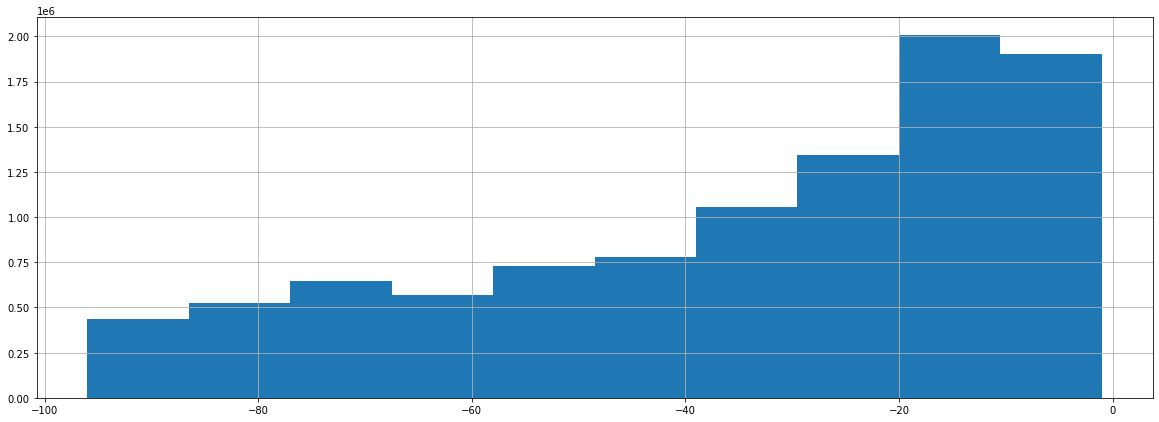

In [32]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance['MONTHS_BALANCE'].hist()

MONTHS_BALANCE is left skewed.

Values = -10, -11, -9, -12, -8 of this variable are extreme.

In [33]:
home_credit_POS_CASH_balance['MONTHS_BALANCE'].value_counts()

-10    216441
-11    216023
-9     215558
-12    214716
-8     214149
        ...  
-92     42283
-93     41025
-94     39900
-95     38514
-96     36448
Name: MONTHS_BALANCE, Length: 96, dtype: int64

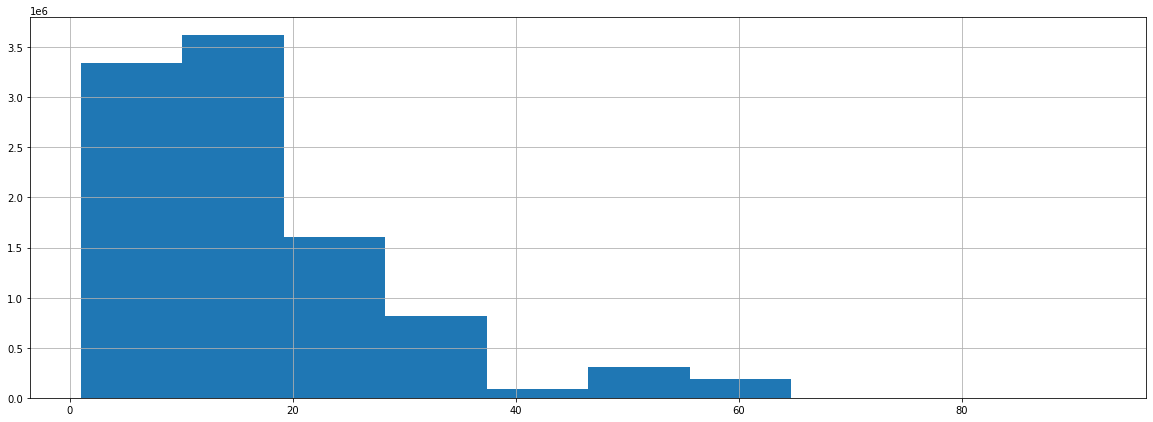

In [34]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance['CNT_INSTALMENT'].hist()

CNT_INSTALMENT is right skewed.

Values = 12.0 of this variable is extreme.

In [35]:
home_credit_POS_CASH_balance['CNT_INSTALMENT'].value_counts()

12.0    2496845
24.0    1517472
10.0    1243449
6.0     1065500
18.0     727394
         ...   
70.0          2
63.0          2
92.0          1
81.0          1
68.0          1
Name: CNT_INSTALMENT, Length: 73, dtype: int64

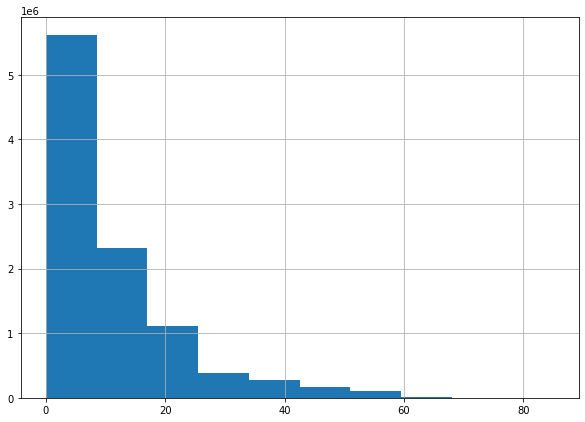

In [36]:
fig = plt.figure(figsize =(10, 7))
home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'].hist()

 CNT_INSTALMENT_FUTURE is right skewed.

 Value = 0.0 of this variable is extreme.

In [37]:
home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'].value_counts()

0.0     1185960
6.0      614058
4.0      613632
5.0      600295
3.0      582007
         ...   
83.0          1
85.0          1
82.0          1
80.0          1
84.0          1
Name: CNT_INSTALMENT_FUTURE, Length: 79, dtype: int64

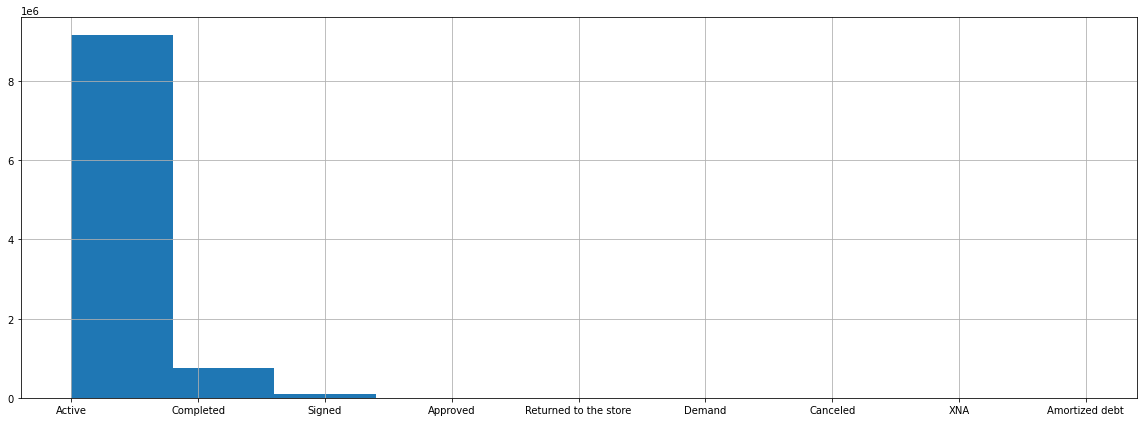

In [38]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance['NAME_CONTRACT_STATUS'].hist()

NAME_CONTRACT_STATUS is right skewed. 

Active NAME_OF_CONTRACT is an extreme value.

In [39]:
home_credit_POS_CASH_balance.NAME_CONTRACT_STATUS.value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

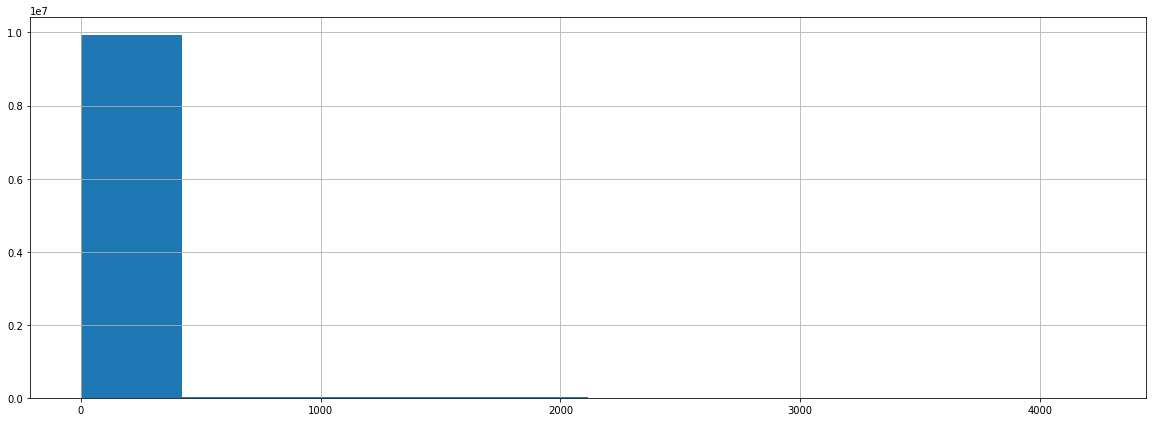

In [40]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance['SK_DPD'].hist()

SK_DPD is right skewed.

Value = 0 of this variable is extreme.

In [41]:
home_credit_POS_CASH_balance['SK_DPD'].value_counts()

0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3161          1
3217          1
3323          1
3399          1
3082          1
Name: SK_DPD, Length: 3400, dtype: int64

The value = 0 of the SK_DPD column is the second most extreme among all variables.

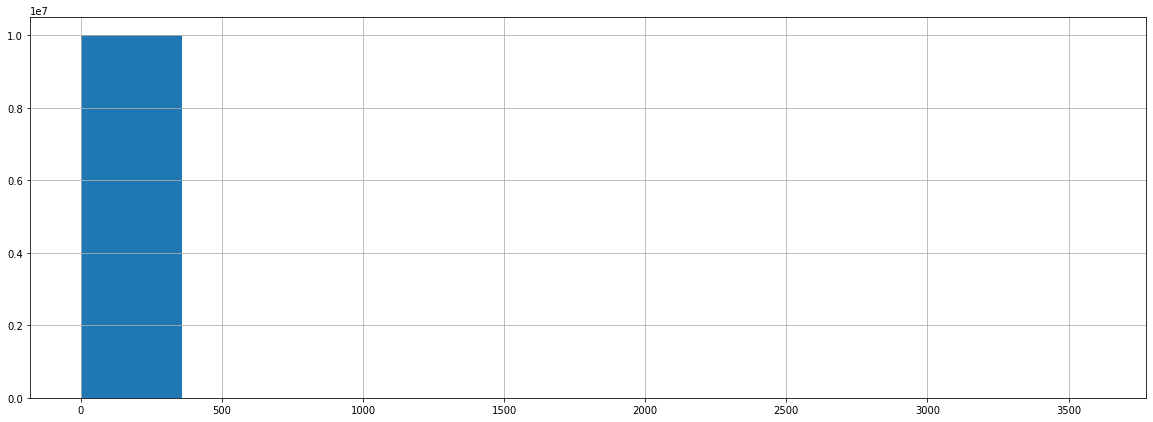

In [42]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance['SK_DPD_DEF'].hist()

SK_DPD_DEF is right skewed.

The value = 0 of the SK_DPD_DEF column is the most extreme among all variables.

In [43]:
home_credit_POS_CASH_balance.SK_DPD_DEF.value_counts()

0       9887389
1         22134
2         14690
3         11652
4          9528
         ...   
1656          1
1291          1
1411          1
2448          1
2495          1
Name: SK_DPD_DEF, Length: 2307, dtype: int64

### Correlation

In [44]:
#Find the correlation between each pair of columns
home_credit_POS_CASH_balance.corr().round(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.0,-0.0,0.00,0.00,0.00,-0.00,0.00
SK_ID_CURR,-0.0,1.0,0.00,0.00,-0.00,0.00,0.00
MONTHS_BALANCE,0.0,0.0,1.00,0.34,0.27,-0.02,-0.00
CNT_INSTALMENT,0.0,0.0,0.34,1.00,0.87,-0.06,-0.01
CNT_INSTALMENT_FUTURE,0.0,-0.0,0.27,0.87,1.00,-0.08,-0.02
SK_DPD,-0.0,0.0,-0.02,-0.06,-0.08,1.00,0.25
SK_DPD_DEF,0.0,0.0,-0.00,-0.01,-0.02,0.25,1.00


CNT_INSTALMENT and CNT_INSTALMENT_FUTURE is the most positive correlated pair.

In [46]:
home_credit_quant_df = home_credit_POS_CASH_balance[["SK_ID_PREV", "SK_ID_CURR", "MONTHS_BALANCE", "CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "SK_DPD", "SK_DPD_DEF"]].copy()

In [ ]:
# fig = plt.figure(figsize =(20, 20))
# ax = sns.heatmap(home_credit_quant_df)

### Box plot


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


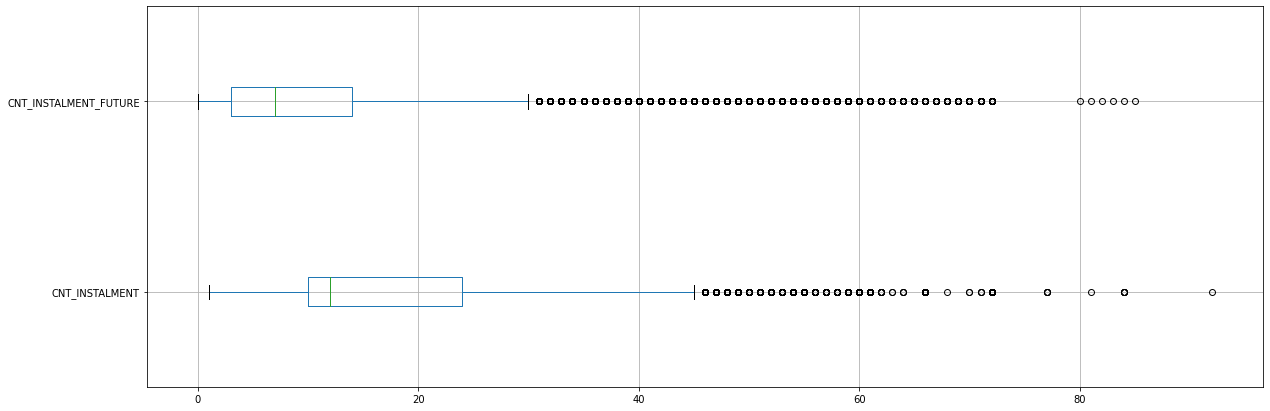

In [64]:
fig = plt.figure(figsize =(20, 7))
home_credit_POS_CASH_balance.boxplot(column=['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], vert = 0)  

The Outliers (both min and max of outliers), Quantiles 1, 2, 3 of CNT_INSTALMENT are greater the ones of CNT_INSTALMENT_FUTURE.


In [65]:
home_credit_POS_CASH_balance['CNT_INSTALMENT'].round(decimals = 3)
home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'].round(decimals = 3)

0           45.0
1           35.0
2            9.0
3           42.0
4           35.0
            ... 
10001353     0.0
10001354     0.0
10001355     0.0
10001356     0.0
10001357     0.0
Name: CNT_INSTALMENT_FUTURE, Length: 10001358, dtype: float64

### PCA for 2 variables

In [67]:
home_credit_POS_CASH_balance.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [77]:
home_credit_POS_CASH_balance.fillna(0)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [73]:
home_credit_POS_CASH_balance['CNT_INSTALMENT'] = home_credit_POS_CASH_balance['CNT_INSTALMENT'].astype(np.float64)

In [74]:
home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'] = home_credit_POS_CASH_balance['CNT_INSTALMENT_FUTURE'].astype(np.float64)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
pcs.fit(home_credit_POS_CASH_balance[['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']])

In [ ]:
# # Assign data into bins [0,10] using the method pd.cut. Default
# # creates a categorical variable, e.g. (6,7]. labels=False determines
# # integers instead, e.g. 6.
# home_credit_POS_CASH_balance['RM_bin'] = pd.cut(home_credit_POS_CASH_balance.RM, range(0, 10), labels=False)
# print(home_credit_POS_CASH_balance['RM_bin'].head(9), home_credit_POS_CASH_balance['RM'].head(9))